<a href="https://colab.research.google.com/github/FaliaAmalia/Tugas_Damin2403/blob/master/TugasDamin_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import sklearn
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [51]:
from google.colab import files
uploaded = files.upload()

Saving datadamin1.csv to datadamin1.csv


In [53]:
data = pd.read_csv('datadamin1.csv')
data.head()

,x,y,jarak_1,jarak_2,jarak_3,type
0,9.802,10.132,11.246,10.122,12.298,0
1,10.350,9.768,12.276,10.990,11.392,0
2,10.098,9.988,12.374,10.018,11.346,0
3,9.730,9.910,12.530,10.000,12.062,0
4,9.754,10.430,12.270,9.792,11.560,3


In [55]:
data_fix = data[['x','y','jarak_1','jarak_2','jarak_3','type']].head(500)
data_fix.head()

,x,y,jarak_1,jarak_2,jarak_3,type
0,9.802,10.132,11.246,10.122,12.298,0
1,10.350,9.768,12.276,10.990,11.392,0
2,10.098,9.988,12.374,10.018,11.346,0
3,9.730,9.910,12.530,10.000,12.062,0
4,9.754,10.430,12.270,9.792,11.560,3


In [56]:
data_fix['type'].value_counts()

1    21
0    18
3     6
2     5
Name: type, dtype: int64

In [0]:
X = data_fix.drop(['type'], axis=1)

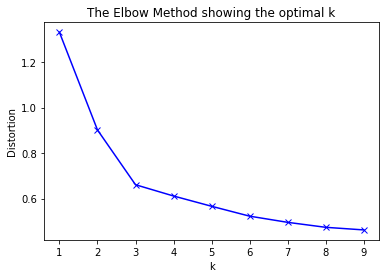

In [65]:
distortions = []
K = range (1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'),axis=1))/ X.shape[0])

# plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

KeyError: ignored

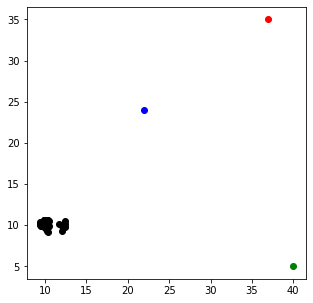

In [73]:
model_kme = KMeans(n_clusters= 2)
model_kme.fit(X)

centroids = {
    i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}

fig = plt.figure(figsize=(5, 5))
plt.scatter(data['x'], data['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
  plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 40)
plt.xlim(0, 40)
plt.show()

In [75]:
pred_kme = model_kme.predict(X)
pred_kme

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [0]:
data_kme = X.copy()

In [0]:
data_kme['cluster'] = pred_kme

In [78]:
data_kme.head(50)

,x,y,jarak_1,jarak_2,jarak_3,cluster
0,9.802,10.132,11.246,10.122,12.298,1
1,10.350,9.768,12.276,10.990,11.392,1
2,10.098,9.988,12.374,10.018,11.346,1
3,9.730,9.910,12.530,10.000,12.062,1
4,9.754,10.430,12.270,9.792,11.560,1
5,9.836,9.902,12.364,10.176,11.724,1
6,10.238,9.866,12.458,10.180,11.576,1
7,9.530,9.862,11.952,9.682,11.114,1
8,10.154,9.820,11.772,9.924,11.634,1
9,9.336,10.456,11.502,10.008,12.052,1


In [79]:
data_kme['cluster'].value_counts()

1    31
0    19
Name: cluster, dtype: int64